In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Text Mining & Image Recognition

**Hoja de Trabajo # 1**

Instrucciones: A continuación verá una lista de ejercicios que debe completar para poder entregar
la hoja de trabajo #1. Al finalizar, deberá subir al GES el link a su repositorio de GIT donde se
incluya el Notebook con su solución.

## Problema 1:

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la
función debe devolver una imagen la cual tenga activos los canales de color según los siguientes
puntos:

* Si el parámetro color vale 1, la imagen debe mostrar activos únicamente el color azul.
* Si el parámetro color vale 2, la imagen debe mostrar activos únicamente el color verde.
* Si el parámetro color vale 3, la imagen debe mostrar activos únicamente el color rojo.
* Si el parámetro color vale 10, la imagen debe mostrar activos únicamente los colores rojo y
verde.
* Si el parámetro color vale 20, la imagen debe mostrar activos únicamente los colores verde y
azul.
* Si el parámetro color vale 30, la imagen debe mostrar activos únicamente los colores azul y
rojo.

In [190]:
def color_activo(img1:np.ndarray, color:int) -> np.ndarray:
    """
    Mantiene activos algunos canales de color en la imagen. Asumiendo que está en el formato RGB.
    """
    assert color in [1,2,3, 10,20,30], "El color debe ser un entero entre 1, 2, 3, 10, 20, 30"
    assert type(img1) is np.ndarray, "La imagen debe ser una matriz numpy"

    img = np.zeros(img1.shape, dtype=np.uint8)
    if color == 1:  # solo azul
        img[:, :, 2] = img1[:, :, 2]
    elif color == 2:  # solo verde
        img[:, :, 1] = img1[:, :, 1]
    elif color == 3:  # solo rojo
        img[:, :, 0] = img1[:, :, 0]
    elif color == 10:  # rojo y verde
        img[:, :, 0] = img1[:, :, 0]
        img[:, :, 1] = img1[:, :, 1]
    elif color == 20:  # verde y azul
        img[:, :, 1] = img1[:, :, 1]
        img[:, :, 2] = img1[:, :, 2]
    elif color == 30:  # azul y rojo
        img[:, :, 2] = img1[:, :, 2]
        img[:, :, 0] = img1[:, :, 0]
    return img

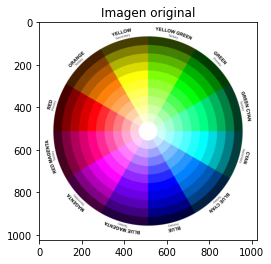

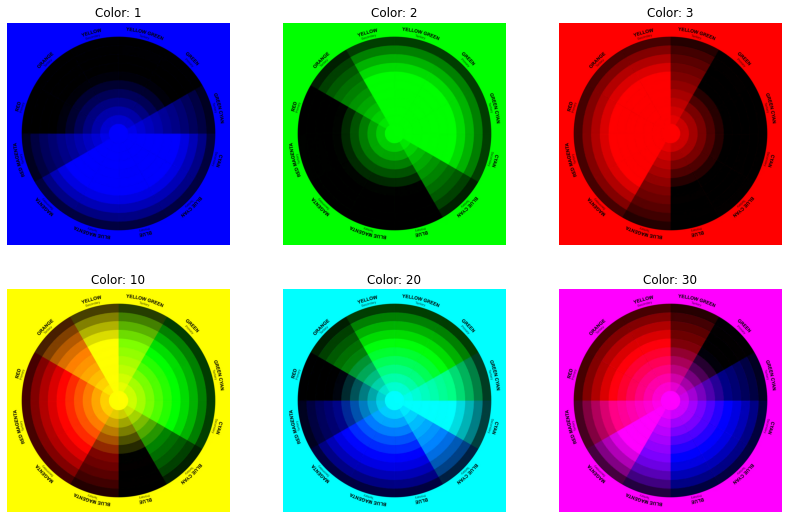

In [191]:
imagen = cv2.imread('imagenes/colors.webp')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.title('Imagen original')
plt.show()

opciones = [1, 2, 3, 10, 20, 30]
imagenes = [color_activo(imagen, opcion) for opcion in opciones]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 9))
for ax, image, opcion in zip(axes.flatten(), imagenes, opciones):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Color: {opcion}")

# Problema 2:

En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1,
imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una
función que dadas las 3 imágenes se construya la imagen original a color.

In [192]:
def reconstruye_rgb(img_r, img_g, img_b):
    """
    Reconstruye la imagen en formato RGB a partir de 3 imagenes en gray scale.
    """
    img = np.zeros((img_r.shape[0], img_r.shape[1], 3), dtype=np.uint8)
    img[:, :, 0] = img_r
    img[:, :, 1] = img_g
    img[:, :, 2] = img_b
    return img

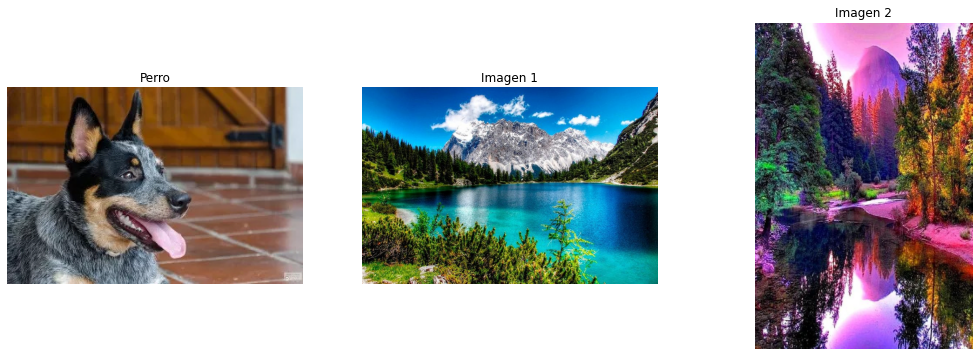

In [193]:
# perro
perro_r = cv2.imread('imagenes/perro/perro_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
perro_g = cv2.imread('imagenes/perro/perro_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
perro_b = cv2.imread('imagenes/perro/perro_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
perro = reconstruye_rgb(perro_r, perro_g, perro_b)

# imagen 1
imagen1_r = cv2.imread('imagenes/imagen1/imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen1_g = cv2.imread('imagenes/imagen1/imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen1_b = cv2.imread('imagenes/imagen1/imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen1 = reconstruye_rgb(imagen1_r, imagen1_g, imagen1_b)

# imagen 2 
imagen2_r = cv2.imread('imagenes/imagen2/imagen2_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)
imagen2_g = cv2.imread('imagenes/imagen2/imagen2_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen2_b = cv2.imread('imagenes/imagen2/imagen2_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen2 = reconstruye_rgb(imagen2_r, imagen2_g, imagen2_b)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for ax, image, nombre in zip(axes.flatten(), [perro, imagen1, imagen2], ['Perro', 'Imagen 1', 'Imagen 2']):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray')
    ax.set_title(f"{nombre}")



## Problema 3:

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en
cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir
una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la
imagen del Problema #2.

In [194]:
def gris_tridimiensional(imagen):
    """Genera 3 imagenes, una con cada canal, a partir de una inicial"""
    assert type(imagen) is np.ndarray, "La imagen debe ser una matriz numpy"
    assert imagen.shape[2] == 3, "La imagen debe tener 3 canales"

    img_r = imagen[:, :, 0]
    img_g = imagen[:, :, 1]
    img_b = imagen[:, :, 2]
    return img_r, img_g, img_b



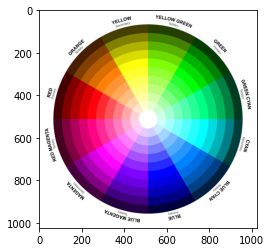

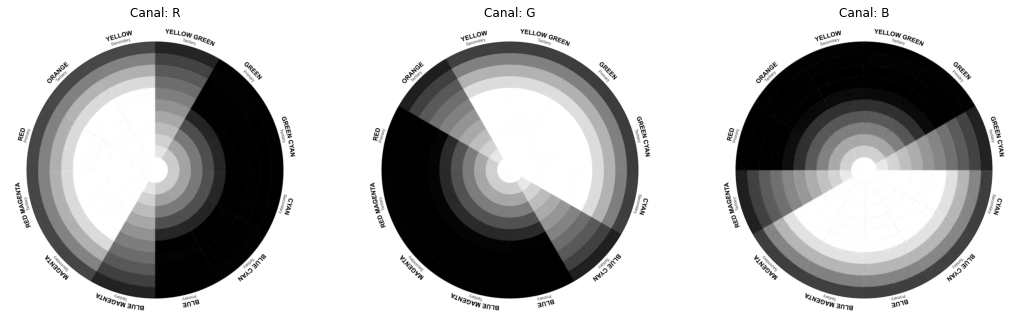

In [195]:
imagen = cv2.imread('imagenes/colors.webp')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
for ax, image, canal in zip(axes, gris_tridimiensional(imagen), ['R', 'G', 'B']):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Canal: {canal}")

## Problema 4:

Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de
escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones
de opencv), sus histogramas deben incluir una lı́nea vertical la cual muestre el valor de la media
de la distribución.

255


/tmp/ipykernel_8757/96810203.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


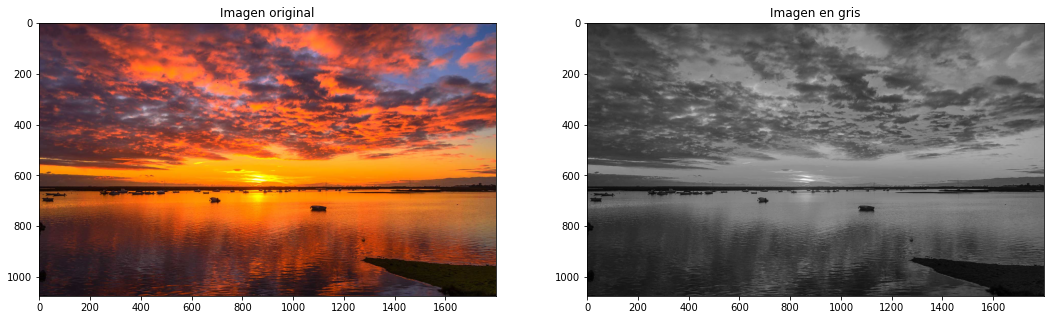

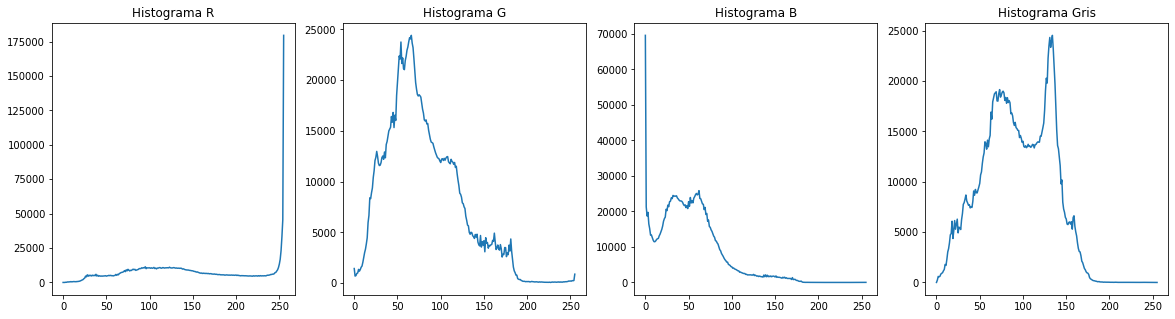

In [212]:
def conv_gris_media_aritmetica(imagen):
    """Convierte la imagen a escala de grises usando una media aritmetica"""
    assert type(imagen) is np.ndarray, "La imagen debe ser una matriz numpy"
    assert imagen.shape[2] == 3, "La imagen debe tener 3 canales"

    img_r, img_g, img_b = gris_tridimiensional(imagen)
    # media aritmetica, se implementa expandiendo la division,
    # ya que numpy trunca el resultado de la suma a un maximo de 255
    # (no se podría sumar primero y despues dividir)
    img_gray = img_r/3 + img_g/3 + img_b/3
    img_gray = img_gray.astype(np.uint8)
    return img_gray


def plot_histograms(imagen):
    """
    Muestra los histogramas de los canales de la imagen, asume imagen en RGB
    """
    assert type(imagen) is np.ndarray, "La imagen debe ser una matriz numpy"
    assert imagen.shape[2] == 3, "La imagen debe tener 3 canales"

    img_r, img_g, img_b = gris_tridimiensional(imagen)
    img_gray = conv_gris_media_aritmetica(imagen)
    print(np.max(img_gray))

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
    axes[0].imshow(imagen)
    axes[0].set_title('Imagen original')
    axes[1].imshow(img_gray, cmap='gray')
    axes[1].set_title('Imagen en gris')

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    for ax, image, canal in zip(axes.flatten(), [img_r, img_g, img_b, img_gray], ['R', 'G', 'B', 'Gris']):
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        ax.plot(hist)
        ax.set_title(f"Histograma {canal}")
    fig.show()


imagen = cv2.imread('imagenes/atardecer.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plot_histograms(imagen)

## Problema 5:


Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

Text(0.5, 1.0, 'Imagen en gris')

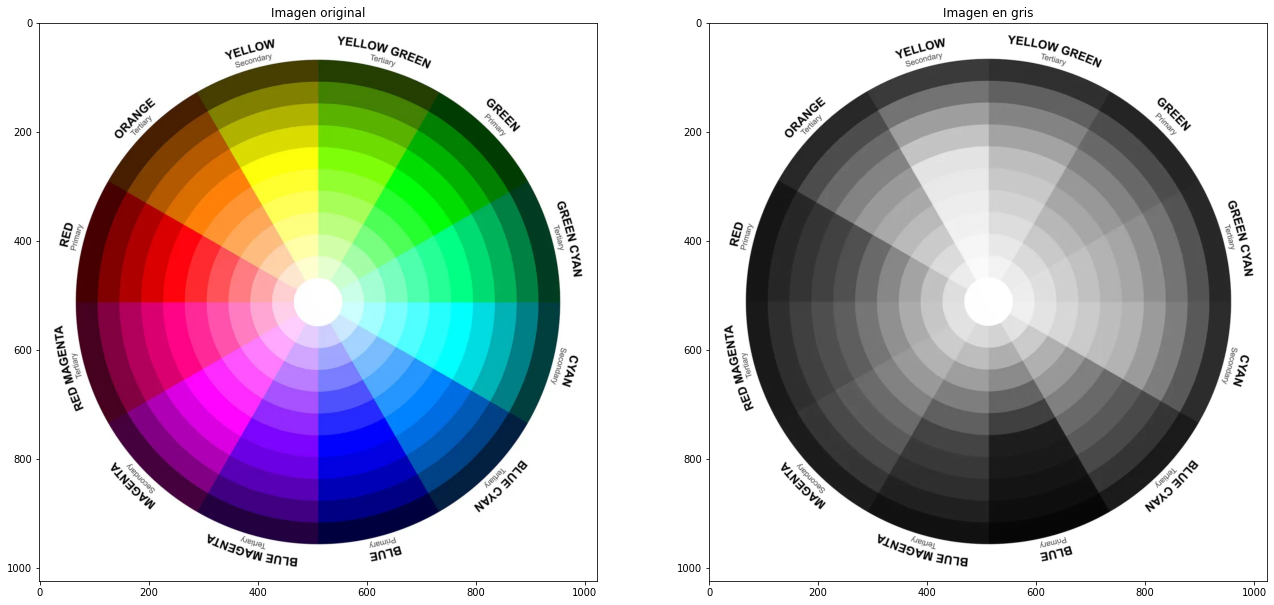

In [213]:
def conv_gris_ponderado(imagen):
    """
    Convierte una imagen en gris, por medio de promedio ponderado.
    """
    assert type(imagen) is np.ndarray, "La imagen debe ser una matriz numpy"
    assert imagen.shape[2] == 3, "La imagen debe tener 3 canales"

    img_r = imagen[:, :, 0]
    img_g = imagen[:, :, 1]
    img_b = imagen[:, :, 2]

    # en grises ponderados se multiplica cada canal por su correspondiente
    # factor, dependiendo de la sensibilidad del ojo humano a cada color
    img_gray = (img_r * 0.3 + img_g * 0.59 + img_b * 0.11)
    return img_gray

imagen = cv2.imread('imagenes/colors.webp')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
gris = conv_gris_ponderado(imagen)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 14))
axes[0].imshow(imagen)
axes[0].set_title('Imagen original')
axes[1].imshow(gris, cmap='gray')
axes[1].set_title('Imagen en gris')

Por experimento, comparemos con la media aritmetica:

Text(0.5, 1.0, 'Media ponderada')

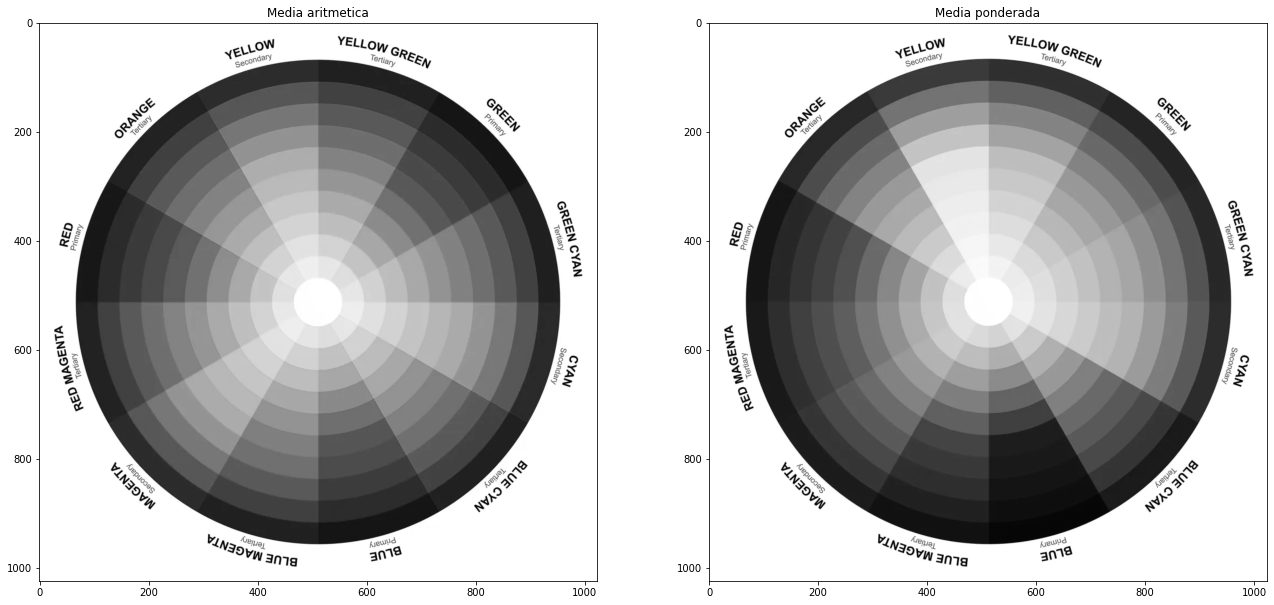

In [214]:
gris2 = conv_gris_media_aritmetica(imagen)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 14))
axes[0].imshow(gris2, cmap='gray')
axes[0].set_title('Media aritmetica')
axes[1].imshow(gris, cmap='gray')
axes[1].set_title('Media ponderada')


## Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho
espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook
donde trabajó los demás ejercicios.

### HSV:

El modelo **HSV** significa *Hue, Saturation, Value*, en español Matiz, Saturación y Valor, define los colores de acuardo a sus componentes.

![modelo hsv](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Cono_de_la_coloraci%C3%B3n_HSV.png/375px-Cono_de_la_coloraci%C3%B3n_HSV.png)

#### Hue

Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.

De forma intuitiva se puede realizar la siguiente transformación para conocer los valores básicos RGB:

Disponemos de 360 grados dónde se dividen los 3 colores RGB, eso da un total de 120º por color, sabiendo esto podemos recordar que el 0 es rojo RGB(1, 0, 0), 120 es verde RGB(0, 1, 0) y 240 es azul RGB(0, 0, 1). Para colores mixtos se utilizan los grados intermedios, el amarillo, RGB(1, 1, 0) está entre rojo y verde, por lo tanto 60º. Se puede observar como se sigue la secuencia de sumar 60 grados y añadir un 1 o quitar el anterior:

#### Saturation
Se representa como la distancia al eje de brillo negro-blanco. Los valores posibles van del 0 al 100%. A este parámetro también se le suele llamar "pureza" por la analogía con la pureza de excitación y la pureza colorimétrica de la colorimetría. Cuanto menor sea la saturación de un color, mayor tonalidad grisácea habrá y más decolorado estará. Por eso es útil definir la insaturación como la inversa cualitativa de la saturación.


#### Value
Representa la altura en el eje blanco-negro. Los valores posibles van del 0 al 100%. 0 siempre es negro. Dependiendo de la saturación, 100 podría ser blanco o un color más o menos saturado.
